<a href="https://colab.research.google.com/github/idc315/presentation-1-group-9/blob/main/Predictive_Analytics_Practice_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4398 non-null   int64  
 1   belongs_to_collection  877 non-null    object 
 2   budget                 4398 non-null   int64  
 3   genres                 4382 non-null   object 
 4   homepage               1420 non-null   object 
 5   imdb_id                4398 non-null   object 
 6   original_language      4398 non-null   object 
 7   original_title         4398 non-null   object 
 8   overview               4384 non-null   object 
 9   popularity             4398 non-null   float64
 10  poster_path            4397 non-null   object 
 11  production_companies   4140 non-null   object 
 12  production_countries   4296 non-null   object 
 13  release_date           4397 non-null   object 
 14  runtime                4394 non-null   float64
 15  spok

# Research and Hypothesis

#  Alternative Hypothesis : Longer movies have higher revenue

# Another Alternative hypothesis :  Shorter movies have lower revenue

# Null hypothesis :  There is no difference in revenue between longer and shorter movies

0.2163801301814721

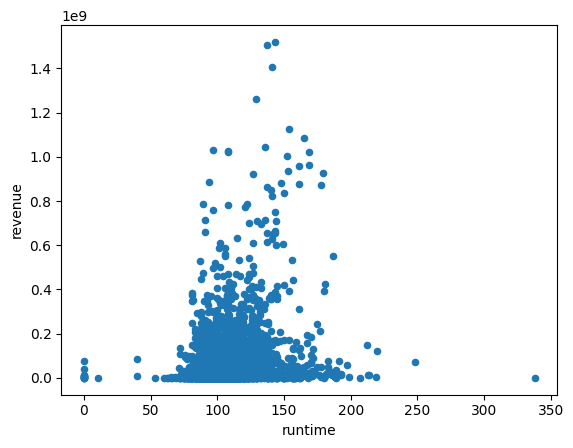

In [ ]:
train.plot.scatter('runtime','revenue')
train.runtime.corr(train.revenue)

Determine if the relationship between runtime and revenue is statistically significant. You can use a hypothesis test such as a t-test to evaluate the significance of the correlation or the difference in means between runtime categories.

In [ ]:
# Define a threshold for 'long' movies (e.g., 120 minutes, i used median for that)
runtime_threshold = train['runtime'].median()  # Using median as the threshold

# Create two groups based on runtime
long_movies_revenue = train[train['runtime'] > runtime_threshold]['revenue']
short_movies_revenue = train[train['runtime'] <= runtime_threshold]['revenue']

from scipy import stats

# Perform the one-tailed t-test (alternative='greater')
t_statistic, p_value = stats.ttest_ind(long_movies_revenue, short_movies_revenue,
                                      alternative='greater')

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is evidence to suggest that longer movies have higher revenue.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is not enough evidence to suggest that longer movies have higher revenue.")

T-statistic: 9.784730182335094
P-value: 1.4064520664273078e-22
Reject the null hypothesis.
There is evidence to suggest that longer movies have higher revenue.


In [ ]:
# Check the validity of the following hypotheses:

#       1. Movies released during certain times of the year (e.g., summer blockbusters) generate higher revenue.
#       2. Genre is a significant predictor of movie revenue.
#       3. Movies with a homepage tend to generate higher revenue.


In [ ]:
train.homepage

,homepage
0,NaN
1,NaN
2,http://sonyclassics.com/whiplash/
3,http://kahaanithefilm.com/
4,NaN
...,...
2995,NaN
2996,NaN
2997,NaN
2998,http://www.alongcamepolly.com/


# Hypo: Movies released during certain times of the year (e.g., summer blockbusters) generate higher revenue.

# Null Hypo:  release timing of a movie (summer blockbuster season or not) has no effect on its average revenue.

In [ ]:
# EDA and Predictive Analytics: Practice Exercises about Sklearn

In [ ]:
pd.set_option('display.max_columns', None)
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [ ]:
# Exploratory Data Analysis
train['revenue'].describe()

,revenue
count,3.000000e+03
mean,6.672585e+07
std,1.375323e+08
min,1.000000e+00
25%,2.379808e+06
50%,1.680707e+07
75%,6.891920e+07
max,1.519558e+09


In [ ]:
train.isna().sum()

,0
id,0
belongs_to_collection,2396
budget,0
genres,7
homepage,2054
imdb_id,0
original_language,0
original_title,0
overview,8
popularity,0


In [ ]:
# Top ten movies with the budgets.
budget = train.sort_values(by='budget', ascending=False)
budget.head(10)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
2135,2136,"[{'id': 295, 'name': 'Pirates of the Caribbean...",380000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://disney.go.com/pirates/index-on-stranger...,tt1298650,en,Pirates of the Caribbean: On Stranger Tides,Captain Jack Sparrow crosses paths with a woma...,27.887720,/wNUDAq5OUMOtxMlz64YaCp7gZma.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",5/14/11,136.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Live Forever Or Die Trying.,Pirates of the Caribbean: On Stranger Tides,"[{'id': 658, 'name': 'sea'}, {'id': 1316, 'nam...","[{'cast_id': 15, 'character': 'Captain Jack Sp...","[{'credit_id': '566b4f54c3a3683f56005151', 'de...",1045713802
2209,2210,"[{'id': 295, 'name': 'Pirates of the Caribbean...",300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,tt0449088,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",31.363664,/bXb00CkHqx7TPchTGG131sWV59y.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/07,169.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...","[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",961000000
2770,2771,"[{'id': 86311, 'name': 'The Avengers Collectio...",280000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://marvel.com/movies/movie/193/avengers_ag...,tt2395427,en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,37.379420,/t90Y3G8UGQp0f0DrP60wRu9gfrH.jpg,"[{'name': 'Marvel Studios', 'id': 420}, {'name...","[{'iso_3166_1': 'US', 'name': 'United States o...",4/22/15,141.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A New Age Has Come.,Avengers: Age of Ultron,"[{'id': 8828, 'name': 'marvel comic'}, {'id': ...","[{'cast_id': 76, 'character': 'Tony Stark / Ir...","[{'credit_id': '55d5f7d4c3a3683e7e0016eb', 'de...",1405403694
1425,1426,"[{'id': 8537, 'name': 'Superman Collection', '...",270000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://www.superman.com,tt0348150,en,Superman Returns,Superman returns to discover his 5-year absenc...,13.284712,/e3aLTaD5ppxo3en0GAGceekEPAe.jpg,"[{'name': 'DC Comics', 'id': 429}, {'name': 'L...","[{'iso_3166_1': 'US', 'name': 'United States o...",6/28/06,154.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Superman Returns,"[{'id': 83, 'name': 'saving the world'}, {'id'...","[{'cast_id': 3, 'character': 'Superman / Clark...","[{'credit_id': '553bef6a9251416874003c8f', 'de...",391081192
1270,1271,NaN,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://movies.disney.com/john-carter,tt0401729,en,John Carter,"John Carter is a war-weary, former military ca...",14.670353,/4QDBNt9PmxqUH4Ab2R5xKWqzXiQ.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",3/7/12,132.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Lost in our world, found in another.",John Carter,"[{'id': 818, 'name': 'based on novel'}, {'id':...","[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...",284139100
1630,1631,"[{'id': 8650, 'name': 'Transformers Collection...",260000000,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",http://www.transformersmovie.com/,tt3371366,en,Transformers: The Last Knight,"Autobots and Decepticons are at war, with huma...",39.186819,/s5HQf2Gb3lIO2cRcFwNL9sn1o1o.jpg,"[{'name': 'Paramount Pictures', 

In [ ]:
# Top ten movies with the longest runtime.
runtime = train.sort_values(by='runtime', ascending=False)
runtime.head(10)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
1211,1212,NaN,18000000,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,tt1321865,en,Carlos,"The story of Venezuelan revolutionary, Ilich R...",4.558075,/obHJeOHn8J5XD049nj7KVSpAMEW.jpg,"[{'name': 'Egoli Tossell Film AG', 'id': 2254}...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",5/19/10,338.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The man who hijacked the world,Carlos,"[{'id': 1419, 'name': 'gun'}, {'id': 7336, 'na...","[{'cast_id': 4, 'character': ""Ilich Ram√≠rez S...","[{'credit_id': '57352b61c3a3680253000870', 'de...",871279
1922,1923,NaN,31115000,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",NaN,tt0056937,en,Cleopatra,Historical epic. The triumphs and tragedy of t...,8.591238,/bj7rUGUewofA9cpHt1h36gvDFfy.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",6/12/63,248.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The motion picture the world has been waiting ...,Cleopatra,"[{'id': 5049, 'name': 'ancient rome'}, {'id': ...","[{'cast_id': 2, 'character': 'Cleopatra', 'cre...","[{'credit_id': '52fe4493c3a36847f809de91', 'de...",71000000
523,524,NaN,13000000,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",NaN,tt0049833,en,The Ten Commandments,"Escaping death, a Hebrew infant is raised in a...",11.147040,/loLrO3SfhHkN3o3fTHdx1vf9ZYf.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/5/56,220.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,The Ten Commandments,"[{'id': 1160, 'name': 'egypt'}, {'id': 2618, '...","[{'cast_id': 9, 'character': 'Moses', 'credit_...","[{'credit_id': '58acab8cc3a3686f0d00093f', 'de...",122700000
1302,1303,NaN,44000000,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,tt0080855,en,Heaven's Gate,Harvard graduate James Averill (Kris Kristoffe...,4.393576,/sG8bBoqX0gZQBoYNBSwqCtMRJli.jpg,"[{'name': 'United Artists', 'id': 60}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",11/19/80,219.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The only thing greater than their passion for ...,Heaven's Gate,"[{'id': 680, 'name': 'montana'}, {'id': 797, '...","[{'cast_id': 1, 'character': 'James Averill', ...","[{'credit_id': '52fe43d49251416c7501fcf7', 'de...",3484331
1914,1915,NaN,56000000,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",NaN,tt0279111,en,Gods and Generals,The film centers mostly around the personal an...,5.374563,/jodqsKcMfd31vqXHCosQ8joB5Hm.jpg,"[{'name': 'Warner Bros. Pictures', 'id': 174},...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/21/03,214.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The nations heart was touched by...,Gods and Generals,"[{'id': 6091, 'name': 'war'}, {'id': 14643, 'n...","[{'cast_id': 3, 'character': 'Lt. Gen. Thomas ...","[{'credit_id': '52fe469e9251416c7507dfbb', 'de...",12923936
2353,2354,NaN,8376800,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.jodhaaakbar.com/,tt0449994,hi,Jodhaa Akbar,Jodhaa Akbar is a sixteenth century love story...,12.237488,/fi2aEp8RpVoh4jYRsOUcTRinYNd.jpg,"[{'name': 'UTV Motion Pictures', 'id': 2320}, ...","[{'iso_3166_1': 'IN', 'name': 'India'}]",2/15/08,213.0,"[{'iso_639_1': 'hi', 'name': 'हिन्दी'}, {'iso_...",Released,NaN,Jodhaa Akbar,"[{'id': 1157, 'name': 'wife husband relationsh...","[{'cast_id': 1, 'character': 'Jalaluddin Moham...","[{'credit_id': '52fe45c99251416c75062761', 'de...",13000000
625,626,NaN,15000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,tt0052618,en,Ben-Hur,Ben-Hur is a 1959 epic film directed by Willia...,14.319743,/syPMBvvZsADTTRu3UKuxO1Wflq.jpg,"[{'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8...","[

In [ ]:
# Top ten movies with the highet revenue
revenue = train.sort_values(by='revenue', ascending=False)
revenue.head(10)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
1126,1127,"[{'id': 86311, 'name': 'The Avengers Collectio...",220000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",http://marvel.com/avengers_movie/,tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,89.887648,/cezWGskPY5x7GaglTTRN4Fugfb8.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",4/25/12,143.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Some assembly required.,The Avengers,"[{'id': 242, 'name': 'new york'}, {'id': 5539,...","[{'cast_id': 46, 'character': 'Tony Stark / Ir...","[{'credit_id': '52fe4495c3a368484e02b1cf', 'de...",1519557910
1761,1762,"[{'id': 9485, 'name': 'The Fast and the Furiou...",190000000,"[{'id': 28, 'name': 'Action'}]",http://www.furious7.com/,tt2820852,en,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...,27.275687,/dCgm7efXDmiABSdWDHBDBx2jwmn.jpg,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",4/1/15,137.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Vengeance Hits Home,Furious 7,"[{'id': 830, 'name': 'car race'}, {'id': 3428,...","[{'cast_id': 17, 'character': 'Dominic Toretto...","[{'credit_id': '52fe4cc8c3a36847f823e681', 'de...",1506249360
2770,2771,"[{'id': 86311, 'name': 'The Avengers Collectio...",280000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://marvel.com/movies/movie/193/avengers_ag...,tt2395427,en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,37.379420,/t90Y3G8UGQp0f0DrP60wRu9gfrH.jpg,"[{'name': 'Marvel Studios', 'id': 420}, {'name...","[{'iso_3166_1': 'US', 'name': 'United States o...",4/22/15,141.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A New Age Has Come.,Avengers: Age of Ultron,"[{'id': 8828, 'name': 'marvel comic'}, {'id': ...","[{'cast_id': 76, 'character': 'Tony Stark / Ir...","[{'credit_id': '55d5f7d4c3a3683e7e0016eb', 'de...",1405403694
684,685,NaN,160000000,"[{'id': 10751, 'name': 'Family'}, {'id': 14, '...",http://movies.disney.com/beauty-and-the-beast-...,tt2771200,en,Beauty and the Beast,A live-action adaptation of Disney's version o...,287.253654,/tWqifoYuwLETmmasnGHO7xBjEtt.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",3/16/17,129.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Be our guest.,Beauty and the Beast,"[{'id': 254, 'name': 'france'}, {'id': 2343, '...","[{'cast_id': 174, 'character': 'Belle', 'credi...","[{'credit_id': '551879bec3a3681f840004eb', 'de...",1262886337
2322,2323,"[{'id': 8650, 'name': 'Transformers Collection...",195000000,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",http://www.transformersmovie.com/,tt1399103,en,Transformers: Dark of the Moon,Sam Witwicky takes his first tenuous steps int...,4.503505,/sZY3ls18QTY0pFBJn2vl2MmauTQ.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",6/28/11,154.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The invasion we always feared. An enemy we nev...,Transformers: Dark of the Moon,"[{'id': 305, 'name': 'moon'}, {'id': 1612, 'na...","[{'cast_id': 3, 'character': 'Sam Witwicky', '...","[{'credit_id': '537f0b740e0a2624b40044d0', 'de...",1123746996
906,907,"[{'id': 263, 'name': 'The Dark Knight Collecti...",250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,tt1345836,en,The Dark Knight Rises,Following the death of District Attorney Harve...,20.582580,/dEYnvnUfXrqvqeRSqvIEtmzhoA8.jpg,"[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",7/16/12,165.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Legend 

In [ ]:
train.drop(['belongs_to_collection', "imdb_id", "original_title", "overview", "spoken_languages", "status", "tagline", "title", "production_companies", "production_countries","poster_path","Keywords", "cast", "crew"], axis=1, inplace=True)
test.drop(['belongs_to_collection', "imdb_id", "original_title", "overview", "spoken_languages", "status", "tagline", "title", "production_companies", "production_countries", "poster_path","Keywords", "cast", "crew"], axis=1, inplace=True)
pd.set_option('display.max_columns', None)
train.head()

,id,budget,genres,homepage,original_language,popularity,release_date,runtime,revenue
0,1,14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,en,6.575393,2/20/15,93.0,12314651
1,2,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,en,8.248895,8/6/04,113.0,95149435
2,3,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,en,64.299990,10/10/14,105.0,13092000
3,4,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,hi,3.174936,3/9/12,122.0,16000000
4,5,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,ko,1.148070,2/5/09,118.0,3923970


In [ ]:

train.head()
# belongs_to_collection, imdb_id, original_title, overview, spoken_languages, status, tagline, title, Keywords, cast, crew

,id,budget,genres,homepage,original_language,popularity,release_date,runtime,revenue
0,1,14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,en,6.575393,2/20/15,93.0,12314651
1,2,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,en,8.248895,8/6/04,113.0,95149435
2,3,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,en,64.299990,10/10/14,105.0,13092000
3,4,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,hi,3.174936,3/9/12,122.0,16000000
4,5,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,ko,1.148070,2/5/09,118.0,3923970


In [ ]:
train.isnull().sum()

,0
id,0
budget,0
genres,7
homepage,2054
original_language,0
popularity,0
release_date,0
runtime,2
revenue,0


In [ ]:
train.homepage = train.homepage.notnull().astype(int)
test.homepage = test.homepage.notnull().astype(int)

In [ ]:
train.homepage

,homepage
0,0
1,0
2,1
3,1
4,0
...,...
2995,0
2996,0
2997,0
2998,1


In [ ]:
train.dropna(subset="genres",inplace=True)
test.dropna(subset="genres",inplace=True)

train.dropna(subset="runtime",inplace=True)
test.dropna(subset="runtime",inplace=True)

In [ ]:
train.isna().sum()

,0
id,0
budget,0
genres,0
homepage,0
original_language,0
popularity,0
release_date,0
runtime,0
revenue,0


In [ ]:
train.homepage.value_counts()

,count
homepage,
0,2046
1,945


In [ ]:
train.release_date

,release_date
0,2/20/15
1,8/6/04
2,10/10/14
3,3/9/12
4,2/5/09
...,...
2995,4/22/94
2996,3/28/13
2997,10/11/96
2998,1/16/04


In [ ]:
train.release_date = pd.to_datetime(train.release_date)  # Convert to datetime
train.release_date = train.release_date.dt.strftime('%m%d%Y')  # Convert to MMDDYYYY string format
test.release_date = pd.to_datetime(test.release_date)  # Convert to datetime
test.release_date = test.release_date.dt.strftime('%m%d%Y')  # Convert to MMDDYYYY string format
train.release_date

<ipython-input-58-46cc2cccefb2>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train.release_date = pd.to_datetime(train.release_date)  # Convert to datetime
<ipython-input-58-46cc2cccefb2>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test.release_date = pd.to_datetime(test.release_date)  # Convert to datetime


,release_date
0,02202015
1,08062004
2,10102014
3,03092012
4,02052009
...,...
2995,04221994
2996,03282013
2997,10111996
2998,01162004


In [ ]:
train.head()

,id,budget,genres,homepage,original_language,popularity,release_date,runtime,revenue
0,1,14000000,"[{'id': 35, 'name': 'Comedy'}]",0,en,6.575393,02202015,93.0,12314651
1,2,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",0,en,8.248895,08062004,113.0,95149435
2,3,3300000,"[{'id': 18, 'name': 'Drama'}]",1,en,64.299990,10102014,105.0,13092000
3,4,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",1,hi,3.174936,03092012,122.0,16000000
4,5,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",0,ko,1.148070,02052009,118.0,3923970


In [ ]:
# Reset index
train.reset_index(drop=True, inplace=True)

In [ ]:
train.head()

,id,budget,genres,homepage,original_language,popularity,release_date,runtime,revenue
0,1,14000000,"[{'id': 35, 'name': 'Comedy'}]",0,en,6.575393,02202015,93.0,12314651
1,2,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",0,en,8.248895,08062004,113.0,95149435
2,3,3300000,"[{'id': 18, 'name': 'Drama'}]",1,en,64.299990,10102014,105.0,13092000
3,4,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",1,hi,3.174936,03092012,122.0,16000000
4,5,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",0,ko,1.148070,02052009,118.0,3923970


<Axes: xlabel='original_language', ylabel='revenue'>

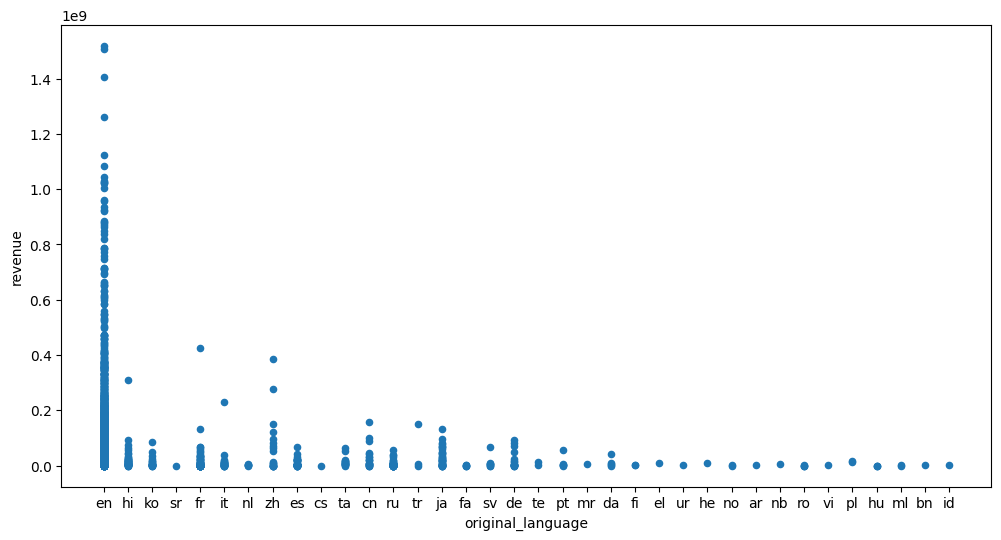

In [ ]:
train.plot.scatter('original_language','revenue', figsize=(12, 6))

In [ ]:
train.original_language

,original_language
0,en
1,en
2,en
3,hi
4,ko
...,...
2986,en
2987,sv
2988,en
2989,en


In [ ]:
#Taking only en and fr into consideration as they are the highest grossing
train.original_language = train.original_language.apply(lambda x: 1 if x=='en' else(2 if x=='fr' else 0))
test.original_language = test.original_language.apply(lambda x: 1 if x=='en' else(2 if x=='fr' else 0))
train.original_language

,original_language
0,1
1,1
2,1
3,0
4,0
...,...
2986,1
2987,0
2988,1
2989,1


In [ ]:
train.original_language.value_counts()

,count
original_language,
1,2571
0,342
2,78


In [ ]:
train['genres']

,genres
0,"[{'id': 35, 'name': 'Comedy'}]"
1,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
2,"[{'id': 18, 'name': 'Drama'}]"
3,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n..."
4,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam..."
...,...
2986,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '..."
2987,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n..."
2988,"[{'id': 80, 'name': 'Crime'}, {'id': 28, 'name..."
2989,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '..."


In [ ]:
train.genres[0]

"[{'id': 35, 'name': 'Comedy'}]"

In [ ]:
type(train.genres[0])

str

In [ ]:
list(train.genres[0])

['[',
 '{',
 "'",
 'i',
 'd',
 "'",
 ':',
 ' ',
 '3',
 '5',
 ',',
 ' ',
 "'",
 'n',
 'a',
 'm',
 'e',
 "'",
 ':',
 ' ',
 "'",
 'C',
 'o',
 'm',
 'e',
 'd',
 'y',
 "'",
 '}',
 ']']

In [ ]:
# # Extract the first genre name, gives error
# train['genres'] = train.genres.apply(lambda x: x[0]['id'] )
# test['genres'] = test.genres.apply(lambda x: x[0]['id'] )

# train.genres

In [ ]:
import ast
# # # # Convert strings to lists of dictionaries
train['genres'] = train.genres.apply(ast.literal_eval)

test['genres'] = test.genres.apply(ast.literal_eval)

# Extract the first genre name
train['genres'] = train.genres.apply(lambda x: x[0]['id'] )
test['genres'] = test.genres.apply(lambda x: x[0]['id'] )

train.genres

,genres
0,35
1,35
2,18
3,53
4,28
...,...
2986,35
2987,18
2988,80
2989,35


0.7527730653758409

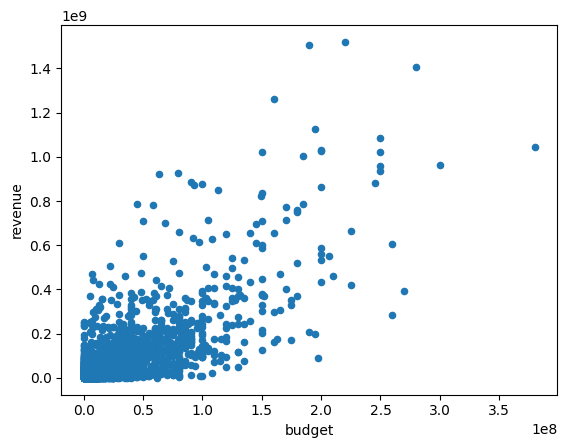

In [ ]:
train.plot.scatter('budget','revenue')

train.budget.corr(train.revenue)

0.46096435754278126

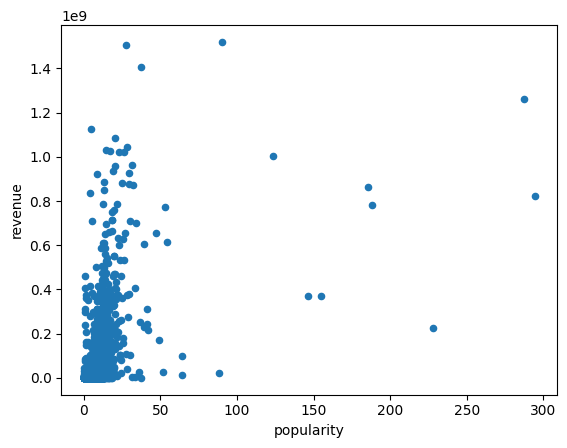

In [ ]:
train.plot.scatter('popularity','revenue')

train.popularity.corr(train.revenue)

0.216799904850525

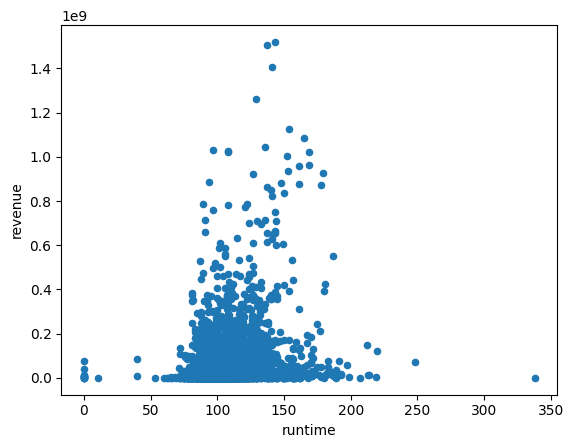

In [ ]:
train.plot.scatter('runtime','revenue')
train.runtime.corr(train.revenue)

0.002610375544872587

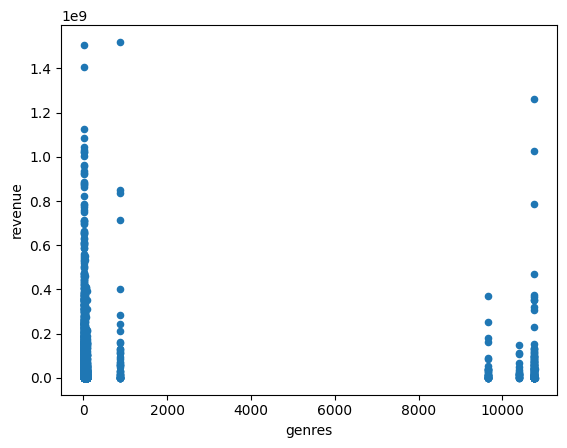

In [ ]:
train.plot.scatter('genres','revenue')
train.genres.corr(train.revenue)

In [ ]:
# for column in train.columns:
#     if column != 'revenue' and column != 'id':  # Exclude 'revenue' itself
#         correlation = train['revenue'].corr(train[column])
#         print(f"Correlation between 'revenue' and '{column}': {correlation}")
#         train.plot.scatter(column,'revenue')

In [ ]:
train

,id,budget,genres,homepage,original_language,popularity,release_date,runtime,revenue
0,1,14000000,35,0,1,6.575393,02202015,93.0,12314651
1,2,40000000,35,0,1,8.248895,08062004,113.0,95149435
2,3,3300000,18,1,1,64.299990,10102014,105.0,13092000
3,4,1200000,53,1,0,3.174936,03092012,122.0,16000000
4,5,0,28,0,0,1.148070,02052009,118.0,3923970
...,...,...,...,...,...,...,...,...,...
2986,2996,0,35,0,1,9.853270,04221994,102.0,1596687
2987,2997,0,18,0,0,3.727996,03282013,102.0,180590
2988,2998,65000000,80,0,1,14.482345,10111996,120.0,89456761
2989,2999,42000000,35,1,1,15.725542,01162004,90.0,171963386


In [ ]:
correlation_matrix = train.corr()
correlation_matrix

,id,budget,genres,homepage,original_language,popularity,release_date,runtime,revenue
id,1.000000,0.020696,-0.016634,-0.006338,-0.001043,-0.006491,0.015586,0.010872,0.001335
budget,0.020696,1.000000,-0.011736,0.247255,0.119493,0.341599,0.032458,0.238867,0.752773
genres,-0.016634,-0.011736,1.000000,0.008262,0.006689,0.028493,-0.014041,-0.010439,0.002610
homepage,-0.006338,0.247255,0.008262,1.000000,-0.003139,0.164167,-0.015656,0.041566,0.262895
original_language,-0.001043,0.119493,0.006689,-0.003139,1.000000,0.085606,-0.013184,-0.104733,0.082909
popularity,-0.006491,0.341599,0.028493,0.164167,0.085606,1.000000,-0.008878,0.134064,0.460964
release_date,0.015586,0.032458,-0.014041,-0.015656,-0.013184,-0.008878,1.000000,0.131353,0.021938
runtime,0.010872,0.238867,-0.010439,0.041566,-0.104733,0.134064,0.131353,1.000000,0.216800
revenue,0.001335,0.752773,0.002610,0.262895,0.082909,0.460964,0.021938,0.216800,1.000000


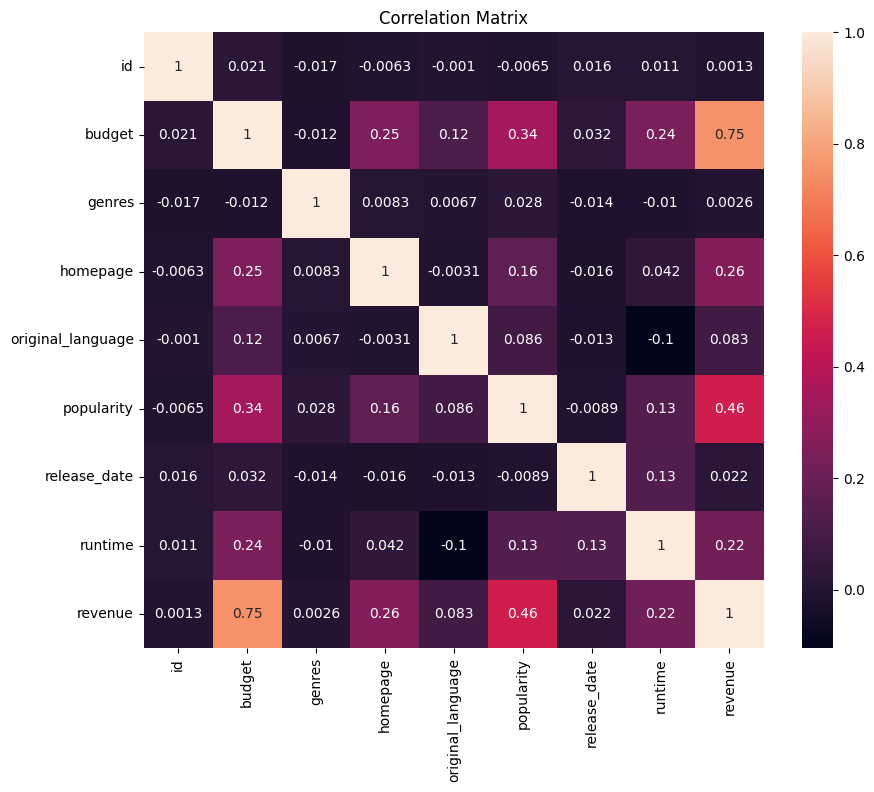

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# from sklearn.linear_model import LinearRegression
# y_train = train.revenue
# # Features and target
# X_train = train.drop('revenue', axis=1)  # Features (drop the 'revenue' column)

# # Train the model
# model = LinearRegression()
# model.fit(X_train, y_train)

# # Check the coefficient for runtime
# print(model.coef_)  # The coefficient for runtime indicates its effect on revenue

In [ ]:
# test.dropna(subset="release_date",inplace=True)

In [ ]:
train.isna().sum()

,0
id,0
budget,0
genres,0
homepage,0
original_language,0
popularity,0
release_date,0
runtime,0
revenue,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# target
y_train = train.revenue

# Features and target
X_train = train.drop(['revenue', 'id'], axis=1)  # Features (drop the 'revenue' and  'id' columns)

x_train, x_test, y_train, y_test=train_test_split(X_train,y_train)
# Train the model
model = LinearRegression()
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_train)

from sklearn.metrics import r2_score
r2_score(y_pred, y_train)


0.343703747063412

0.46096435754278126

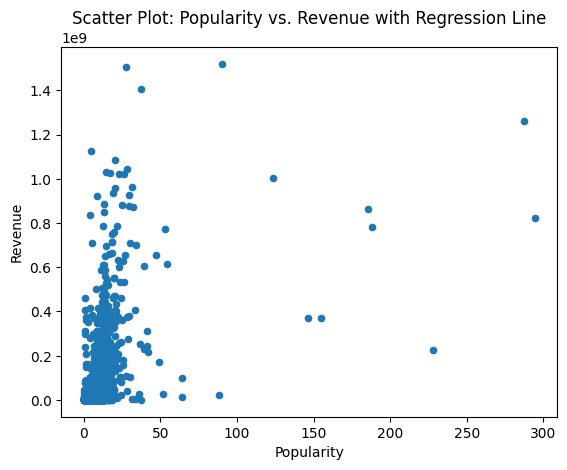

In [ ]:
# Create a scatter plot of 'popularity' vs. 'revenue'

train.plot.scatter('popularity','revenue')
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.title('Scatter Plot: Popularity vs. Revenue with Regression Line')

train.popularity.corr(train.revenue)

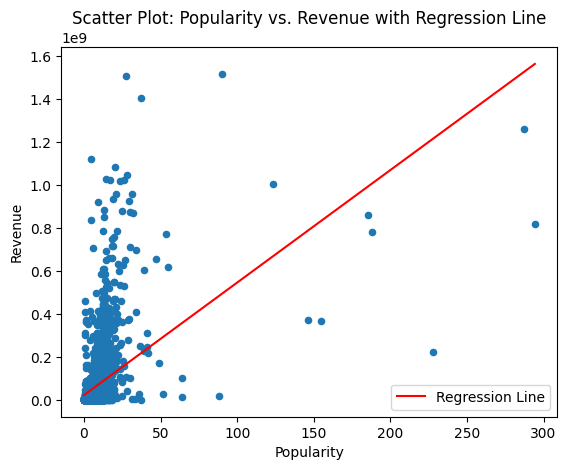

Correlation between Popularity and Revenue: 0.46096435754278126


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Create a scatter plot of 'popularity' vs. 'revenue'

train.plot.scatter('popularity','revenue')
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.title('Scatter Plot: Popularity vs. Revenue with Regression Line')

# Calculate the regression line
x = train.popularity.values.reshape(-1, 1)  # Reshape to a 2D array for LinearRegression
y = train.revenue.values

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x, y)

# Plot the regression line
x_line = np.linspace(train['popularity'].min(), train['popularity'].max(), 100)  # Create x values for the line
y_line = regressor.predict(x_line.reshape(-1, 1))  # Predict y values using the regression model
plt.plot(x_line, y_line, color='red', label='Regression Line')  # Plot the line

# Add legend and show the plot
plt.legend()
plt.show()

# Calculate the correlation between 'popularity' and 'revenue'
correlation = train['popularity'].corr(train['revenue'])
print(f"Correlation between Popularity and Revenue: {correlation}")

0.7527730653758409

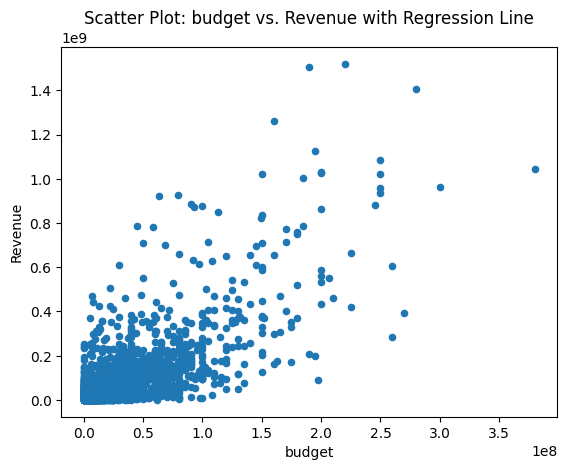

In [ ]:
train.plot.scatter('budget','revenue')
plt.xlabel('budget')
plt.ylabel('Revenue')
plt.title('Scatter Plot: budget vs. Revenue with Regression Line')

train.budget.corr(train.revenue)

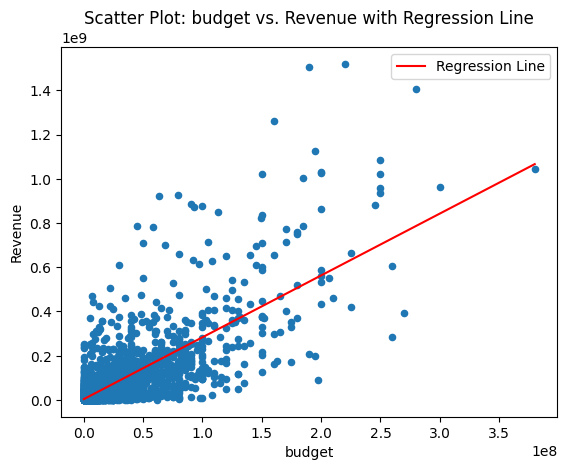

Correlation between Budget and Revenue: 0.7527730653758409


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

train.plot.scatter('budget','revenue')
plt.xlabel('budget')
plt.ylabel('Revenue')
plt.title('Scatter Plot: budget vs. Revenue with Regression Line')

train.budget.corr(train.revenue)

# Calculate the regression line
x = train.budget.values.reshape(-1, 1)  # Reshape to a 2D array for LinearRegression
y = train.revenue.values



from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x, y)

# Plot the regression line
x_line = np.linspace(train['budget'].min(), train['budget'].max(), 100)  # Create x values for the line
y_line = regressor.predict(x_line.reshape(-1, 1))  # Predict y values using the regression model
plt.plot(x_line, y_line, color='red', label='Regression Line')  # Plot the line


# Add legend and show the plot
plt.legend()
plt.show()

# Calculate the correlation between 'budget' and 'revenue'
correlation = train['budget'].corr(train['revenue'])
print(f"Correlation between Budget and Revenue: {correlation}")

# Hypothese is that budget has positive effect on revenue
# Null hypothese is that budget has no effect on revenue

In [ ]:
# equal_var=False: This parameter is about whether the variances of the two groups (budget and revenue in your case) are assumed to be equal. Setting it to False means you're using Welch's t-test, which doesn't assume equal variances.
# This is generally a safer choice unless you have strong evidence that the variances are equal.
# alternative='greater': This parameter is used when you have a directional hypothesis (like Longer movies have higher revenue),
# meaning you're specifically testing if one group's mean is greater than the other.
# In our work herein, we're simply trying to determine if there's a significant relationship (positive or negative), not if one is greater.

# equal_var=True (default): This assumes that the variances of the two groups are equal.
# This leads to the standard Student's t-test being performed.
# equal_var=False: This assumes that the variances of the two groups are not equal.
# This leads to t-test being performed, which is a more robust version of the t-test that doesn't rely on the equal variance assumption.


from scipy import stats

feature1 = "budget"
target = "revenue"

# Access the columns using bracket notation
feature1_data = train[feature1]
target_data = train[target]

# Calculate Pearson correlation coefficient and p-value (Welch's t-test)
correlation, p_value = stats.ttest_ind(feature1_data, target_data, equal_var=False)

print(f"Pearson correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

alpha = 0.05  # Significance level

if correlation <= 0 and p_value < alpha:
    print("Reject null hypothesis")
    print(f"Conclusion: There is no positive relationship between {feature1} and {target}.")
elif correlation > 0 and p_value < alpha:
    print("Reject null hypothesis")
    print(f"Conclusion: There is a positive relationship between {feature1} and {target}.")
elif correlation <= 0 and p_value >= alpha:
    print("Fail to reject null hypothesis")
    print(f"Conclusion: There is not enough evidence to suggest a positive or negative relationship between {feature1} and {target}.")
else:  # correlation > 0 and p_value >= alpha
    print("Fail to reject null hypothesis")
    print(f"Conclusion: There is not enough evidence to suggest a positive relationship between {feature1} and {target}, although the correlation is positive.")

Pearson correlation coefficient: -17.001888216505858
P-value: 2.68798157696566e-62
Reject null hypothesis
Conclusion: There is no positive relationship between budget and revenue.


Exercise 1: Correlation


* What does the correlation coefficient between budget and revenue tell you about the relationship between these two variables?
*  Based on the correlation coefficient, would you expect a movie with a higher budget to generally have higher or lower revenue?

Exercise 2: Hypothesis Testing

*  State the null and alternative hypotheses for the t-test performed to determine if longer movies have higher revenue.
*  Explain what a p-value represents in the context of this t-test.
*  If the p-value was found to be 0.02, what conclusion would you draw about the relationship between movie runtime and revenue at a significance level of 0.05?

Exercise 3: Data Exploration

*  How many movies in the dataset have a homepage?
*  What is the median runtime of movies in the dataset?
*  Which movie in the dataset has the highest revenue?
E
xercise 4: Regression

*  What type of regression model was used in the code?
*  What are the features used in the regression model?
*  How well does the regression model fit the data, based on the R-squared value?